# Language Detection Model

### Using NLP create a model which can detect 5 different languages

#### Import all required libraries

In [1]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Getting data from csv file

In [9]:
data = pd.read_csv('en_hi.csv')
data=data[data['source']=='ted']

### English Language Data

In [4]:
eng_df = pd.DataFrame(data['english_sentence'])
eng_df.head()

,english_sentence
0,politicians do not have permission to do what ...
1,"I'd like to tell you about one such child,"
3,what we really mean is that they're bad at not...
7,"And who are we to say, even, that they are wrong"
13,So there is some sort of justice


### Hindi Language Data

In [11]:
hin_df = pd.DataFrame(data['hindi_sentence'])
hin_df.head()

,hindi_sentence
0,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
3,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
7,और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
13,तो वहाँ न्याय है


### German Language Data

In [15]:
data = pd.read_csv("deu.txt","utf-8",header=None, names=["German"])
ger_df = data
ger_df.head()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,German
0,Hi.\tHallo!
1,Hi.\tGrÃ¼ÃŸ Gott!
2,Run!\tLauf!
3,Fire!\tFeuer!
4,Help!\tHilfe!


### function to read raw text file

In [16]:
def read_text(filename):
        # open the file
        file = open(filename, mode='rt', encoding='utf-8')
        
        # read all text
        text = file.read()
        file.close()
        return text

#### Function to split a text into sentences

In [18]:
def to_lines(text):
      sents = text.strip().split('\n')
      sents = [i.split('\t') for i in sents]
      return sents

### Marathi Language Data

In [20]:
data = read_text("mar.txt")
mar_df = to_lines(data)
mar_df = pd.DataFrame(mar_df)
mar_df = pd.DataFrame(mar_df[1])
mar_df['Marathi'] = mar_df[1]
mar_df.drop([1],axis="columns",inplace=True)
mar_df.head()

,Marathi
0,जा.
1,पळ!
2,धाव!
3,पळा!
4,धावा!


### French Language Data

In [22]:
data = pd.read_csv('eng_fr.csv')
fr_df = pd.DataFrame(data['French words/sentences'])
fr_df.head()

,French words/sentences
0,Salut!
1,Cours !
2,Courez !
3,Qui ?
4,Ça alors !


### Creating a dictonary which contain punctuation marks

In [24]:
for char in string.punctuation:
    print(char, end=" ")
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

## Creating 2 dictonaries of all 5 indivisual languages containing words/ sentences without any punctuation marks

In [25]:
data_eng = []
lang_eng = []
for i,line in eng_df.iterrows():
    line = line['english_sentence']
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [26]:
data_fr = []
lang_fr = []
for i,line in fr_df.iterrows():
    line = line['French words/sentences']
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_fr.append(line)
        lang_fr.append("French")

In [27]:
data_hin = []
lang_hin = []
for i,line in hin_df.iterrows():
    line = line['hindi_sentence']
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_hin.append(line)
        lang_hin.append("Hindi")

In [28]:
data_ger = []
lang_ger = []
for i,line in ger_df.iterrows():
    line = line['German']
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [29]:
data_mar = []
lang_mar = []
for i,line in mar_df.iterrows():
    line = line['Marathi']
    if len(line) != 0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_mar.append(line)
        lang_mar.append("Marathi")

## Creating a Database containing all the lanuages

In [30]:
df = pd.DataFrame({"Text": data_eng + data_ger  + data_fr,
                  "language": lang_eng  + lang_ger + lang_fr})
print(df.shape)

(385315, 2)


In [31]:
df.head()

,Text,language
0,politicians do not have permission to do what ...,English
1,id like to tell you about one such child,English
2,what we really mean is that theyre bad at not ...,English
3,and who are we to say even that they are wrong,English
4,so there is some sort of justice,English


## Splitting Data into 80%-20% of training and testing data for model creation

In [32]:
X, y = df.iloc[:,0], df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(308252,)
(77063,)
(308252,)
(77063,)


## Applying TfidfVectorizer to calculate each term frequencies 

In [34]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3),analyzer='char')

pipe_lr_r13 = pipeline.Pipeline([('vectorizer', vectorizer), ('clf', linear_model.LogisticRegression())])

### Model fitting

In [35]:
pipe_lr_r13.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sc

### Making Predictions on test dataset

In [36]:
y_predicted = pipe_lr_r13.predict(X_test)

### Getting Accuracy of Model

In [37]:
acc = (metrics.accuracy_score(y_test, y_predicted))*100
print(acc,'%')

99.94549913706967 %


### Printing the confusion Metrics

In [38]:
matrix = metrics.confusion_matrix(y_test, y_predicted)
print('Confusion Matrxi : \n', matrix)

Confusion Matrxi : 
 [[ 7808    24     6]
 [    6 35262     0]
 [    6     0 33951]]


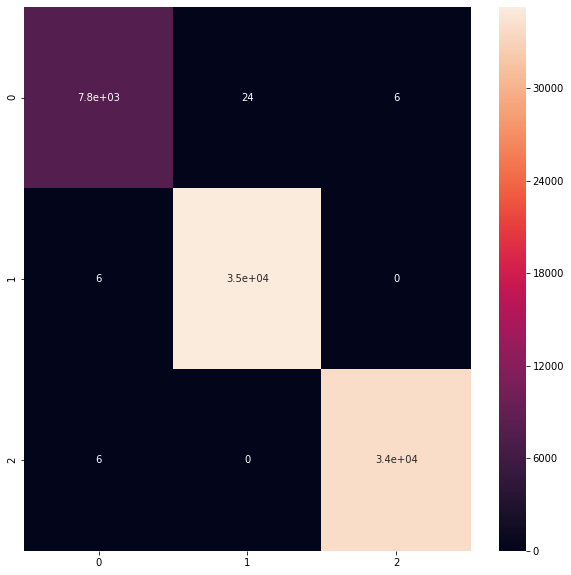

In [39]:
plt.subplots(figsize=(10,10))
sns.heatmap(matrix,annot=True)

## Extracting the Model in Pickle format

In [40]:
import pickle

lrFile = open('LRModel_up.pckl', 'wb')
pickle.dump(pipe_lr_r13, lrFile)
lrFile.close()